# Clasificador gaussiano ingenuo (Gaussian Naive Classifier)

In [23]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self, epsilon=1e-5):
        self.epsilon = epsilon
        self.probs = {}
        self.means = {}
        self.stds = {}

    def fit(self, X, y):
        classes = np.unique(y)
        for clase in classes:
            X_c = X[y == clase]
            self.probs[clase] = len(X_c) / len(X)
            self.means[clase] = np.mean(X_c, axis=0)
            self.stds[clase] = np.std(X_c, axis=0) + self.epsilon

    def calculate_likelihood(self, x, mean, std):
        p_x_given_y = (1 / ((np.sqrt(2 * np.pi) * std) + self.epsilon)) * np.exp(-((x - mean) ** 2) / ((2 * (std ** 2)) + self.epsilon))
        return p_x_given_y

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for clase in self.probs:
                mean = self.means[clase]
                std = self.stds[clase]
                class_probs[clase] = np.log(self.probs[clase]) + np.sum(np.log(self.calculate_likelihood(x, mean, std)))

            predicted_class = max(class_probs, key=class_probs.get)
            predictions.append(predicted_class)

        return predictions

# Utilizando descriptor SIFT para clasificar

In [24]:
import cv2
import matplotlib.pyplot as plt

# Descriptor SIFT para extraer características
def puntos_clave(imagen, imagen_g):
    sift = cv2.SIFT_create()
    puntos_clave, descriptores = sift.detectAndCompute(imagen_g, None)
    #imagen_puntos_clave = cv2.drawKeypoints(imagen, puntos_clave, None)

    #plt.imshow(imagen_puntos_clave)
    #plt.title('Identificación de puntos clave')
    #plt.show()

    return puntos_clave, descriptores

In [25]:
comp_ruta = '../../IMAGES/'

In [26]:
unique_labels = ['flowers', 'glass_tiles', 'hairs', 'jelly_beans', 'oil_painting', 'paints', 'photo_and_face', 'pompoms', 'sponges', 'stuffed_toys']
descriptors_list = []
labels = []

for i in range(31):
    for j in range(10):
        # Abrir imagen
        if i < 9:
            ruta = comp_ruta+'complete_ms_data/'+str(unique_labels[j])+'/'+str(unique_labels[j])+'_ms_0'+str(i+1)+'.png'
        else:
            ruta = comp_ruta+'complete_ms_data/'+str(unique_labels[j])+'/'+str(unique_labels[j])+'_ms_'+str(i+1)+'.png'

        print(ruta)
        image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
        # Convertir a RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convertir a escala de grises
        image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Extraer caracteristicas con SIFT
        keypoints, descriptor = puntos_clave(image, image_g)
        # Agregar descriptor al dataset
        descriptors_list.append(descriptor[0])
        labels.append(unique_labels[j])

../../IMAGES/complete_ms_data/flowers/flowers_ms_01.png
../../IMAGES/complete_ms_data/glass_tiles/glass_tiles_ms_01.png
../../IMAGES/complete_ms_data/hairs/hairs_ms_01.png
../../IMAGES/complete_ms_data/jelly_beans/jelly_beans_ms_01.png
../../IMAGES/complete_ms_data/oil_painting/oil_painting_ms_01.png
../../IMAGES/complete_ms_data/paints/paints_ms_01.png
../../IMAGES/complete_ms_data/photo_and_face/photo_and_face_ms_01.png
../../IMAGES/complete_ms_data/pompoms/pompoms_ms_01.png
../../IMAGES/complete_ms_data/sponges/sponges_ms_01.png
../../IMAGES/complete_ms_data/stuffed_toys/stuffed_toys_ms_01.png
../../IMAGES/complete_ms_data/flowers/flowers_ms_02.png
../../IMAGES/complete_ms_data/glass_tiles/glass_tiles_ms_02.png
../../IMAGES/complete_ms_data/hairs/hairs_ms_02.png
../../IMAGES/complete_ms_data/jelly_beans/jelly_beans_ms_02.png
../../IMAGES/complete_ms_data/oil_painting/oil_painting_ms_02.png
../../IMAGES/complete_ms_data/paints/paints_ms_02.png
../../IMAGES/complete_ms_data/photo_and_

In [27]:
unique_labels = ['flowers', 'glass_tiles', 'hairs', 'jelly_beans', 'oil_painting', 'paints', 'photo_and_face', 'pompoms', 'sponges', 'stuffed_toys']

for j in range(10):
    # Abrir imagen
    ruta = comp_ruta+'complete_ms_data/'+str(unique_labels[j])+'/'+str(unique_labels[j])+'_RGB'+'.bmp'

    print(ruta)
    image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    # Convertir a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convertir a escala de grises
    image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Extraer caracteristicas con SIFT
    keypoints, descriptor = puntos_clave(image, image_g)
    # Agregar descriptor al dataset
    descriptors_list.append(descriptor[0])
    labels.append(unique_labels[j])

../../IMAGES/complete_ms_data/flowers/flowers_RGB.bmp
../../IMAGES/complete_ms_data/glass_tiles/glass_tiles_RGB.bmp
../../IMAGES/complete_ms_data/hairs/hairs_RGB.bmp
../../IMAGES/complete_ms_data/jelly_beans/jelly_beans_RGB.bmp
../../IMAGES/complete_ms_data/oil_painting/oil_painting_RGB.bmp
../../IMAGES/complete_ms_data/paints/paints_RGB.bmp
../../IMAGES/complete_ms_data/photo_and_face/photo_and_face_RGB.bmp
../../IMAGES/complete_ms_data/pompoms/pompoms_RGB.bmp
../../IMAGES/complete_ms_data/sponges/sponges_RGB.bmp
../../IMAGES/complete_ms_data/stuffed_toys/stuffed_toys_RGB.bmp


In [28]:
# Separar el dataset en 75% para entrenamiento y 25% para pruebas
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

descriptors = np.array(descriptors_list)
labels = np.array(labels)

#X_train, X_test, y_train, y_test = descriptors[:240], descriptors[240:], labels[:240], labels[240:]
X_train, X_test, y_train, y_test = train_test_split(descriptors, labels, test_size=0.25, stratify=labels, random_state=42)

In [29]:
# Mostrar los datos del descriptor y su clase en un dataframe
data= pd.DataFrame(descriptors)
data['Class'] = labels
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Class
0,76.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,149.0,43.0,...,2.0,11.0,0.0,0.0,2.0,54.0,4.0,0.0,0.0,flowers
1,44.0,0.0,0.0,5.0,31.0,0.0,0.0,2.0,169.0,1.0,...,0.0,0.0,3.0,111.0,2.0,0.0,0.0,0.0,0.0,glass_tiles
2,0.0,0.0,0.0,0.0,0.0,1.0,8.0,3.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,hairs
3,6.0,4.0,4.0,3.0,3.0,11.0,26.0,25.0,43.0,40.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,jelly_beans
4,47.0,0.0,0.0,0.0,37.0,1.0,0.0,3.0,139.0,12.0,...,10.0,0.0,0.0,0.0,38.0,74.0,49.0,2.0,0.0,oil_painting
5,1.0,61.0,25.0,0.0,4.0,61.0,8.0,0.0,5.0,79.0,...,0.0,0.0,0.0,0.0,52.0,24.0,0.0,0.0,0.0,paints
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,12.0,...,6.0,15.0,3.0,3.0,10.0,20.0,7.0,5.0,7.0,photo_and_face
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,4.0,...,29.0,35.0,0.0,0.0,0.0,16.0,96.0,14.0,22.0,pompoms
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,...,2.0,0.0,11.0,77.0,0.0,0.0,0.0,0.0,0.0,sponges
9,1.0,14.0,6.0,3.0,1.0,0.0,0.0,0.0,55.0,52.0,...,0.0,2.0,14.0,142.0,68.0,1.0,0.0,0.0,0.0,stuffed_toys


<Axes: >

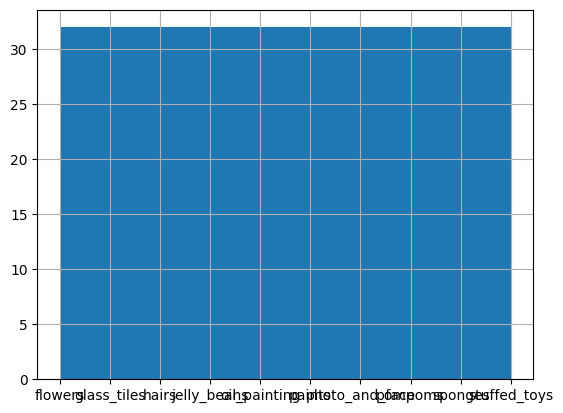

In [30]:
# Mostrar el histograma de clases
# Se muestra que el numero de instancias es igual para todas las clases
data["Class"].hist()

In [31]:
# Clasificamos con Gaussian Naive Bayes
gnb = GaussianNaiveBayes()
# Fit de data
gnb.fit(X_train, y_train)
# Predict
predicted = gnb.predict(X_test)

matriz = []
cont = 0
for tam in range(len(y_test)):
  matriz.append(y_test[tam] == predicted[tam])
  if y_test[tam] == predicted[tam]:
    cont = cont + 1

print(matriz)
percent = cont/len(y_test)*100
print("Accuracy {:.2f}%".format(percent))
print()

[True, True, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True]
Accuracy 80.00%



C:\Users\SZMik\AppData\Local\Temp\ipykernel_4204\506266355.py:29: RuntimeWarning: divide by zero encountered in log
  class_probs[clase] = np.log(self.probs[clase]) + np.sum(np.log(self.calculate_likelihood(x, mean, std)))


In [32]:
from sklearn.metrics import confusion_matrix, f1_score
print('Matriz de confusion:')
print(confusion_matrix(y_test, predicted))
percent = f1_score(y_test, predicted, average='weighted') * 100
print("Accuracy: {:.2f}%".format(percent))

Matriz de confusion:
[[6 0 0 0 0 2 0 0 0 0]
 [2 6 0 0 0 0 0 0 0 0]
 [1 0 7 0 0 0 0 0 0 0]
 [3 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 1]
 [0 0 0 0 0 8 0 0 0 0]
 [1 0 0 0 0 0 7 0 0 0]
 [1 0 0 0 4 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [1 0 0 0 0 0 0 0 0 7]]
Accuracy: 80.61%


# Utilizando descriptor HOG para clasificar

In [33]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

unique_labels = ['flowers', 'glass_tiles', 'hairs', 'jelly_beans', 'oil_painting', 'paints', 'photo_and_face', 'pompoms', 'sponges', 'stuffed_toys']
descriptors_list = []
labels = []
for i in range(31):
    for j in range(10):
        # Abrir imagen
        if i < 9:
            ruta = comp_ruta+'complete_ms_data/'+str(unique_labels[j])+'/'+str(unique_labels[j])+'_ms_0'+str(i+1)+'.png'
        else:
            ruta = comp_ruta+'complete_ms_data/'+str(unique_labels[j])+'/'+str(unique_labels[j])+'_ms_'+str(i+1)+'.png'

        print(ruta)
        image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
        # Convertir a RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convertir a escala de grises
        image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Extraer caracteristicas con HOG
        hog_features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, channel_axis=-1)
        # Agregar descriptor al dataset
        descriptors_list.append(hog_features)
        labels.append(unique_labels[j])

../../IMAGES/complete_ms_data/flowers/flowers_ms_01.png
../../IMAGES/complete_ms_data/glass_tiles/glass_tiles_ms_01.png
../../IMAGES/complete_ms_data/hairs/hairs_ms_01.png
../../IMAGES/complete_ms_data/jelly_beans/jelly_beans_ms_01.png
../../IMAGES/complete_ms_data/oil_painting/oil_painting_ms_01.png
../../IMAGES/complete_ms_data/paints/paints_ms_01.png
../../IMAGES/complete_ms_data/photo_and_face/photo_and_face_ms_01.png
../../IMAGES/complete_ms_data/pompoms/pompoms_ms_01.png
../../IMAGES/complete_ms_data/sponges/sponges_ms_01.png
../../IMAGES/complete_ms_data/stuffed_toys/stuffed_toys_ms_01.png
../../IMAGES/complete_ms_data/flowers/flowers_ms_02.png
../../IMAGES/complete_ms_data/glass_tiles/glass_tiles_ms_02.png
../../IMAGES/complete_ms_data/hairs/hairs_ms_02.png
../../IMAGES/complete_ms_data/jelly_beans/jelly_beans_ms_02.png
../../IMAGES/complete_ms_data/oil_painting/oil_painting_ms_02.png
../../IMAGES/complete_ms_data/paints/paints_ms_02.png
../../IMAGES/complete_ms_data/photo_and_

In [34]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

unique_labels = ['flowers', 'glass_tiles', 'hairs', 'jelly_beans', 'oil_painting', 'paints', 'photo_and_face', 'pompoms', 'sponges', 'stuffed_toys']

for j in range(10):
    # Abrir imagen
    ruta = comp_ruta+'complete_ms_data/'+str(unique_labels[j])+'/'+str(unique_labels[j])+'_RGB'+'.bmp'

    print(ruta)
    image = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    # Convertir a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convertir a escala de grises
    image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Extraer caracteristicas con HOG
    hog_features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    # Agregar descriptor al dataset
    descriptors_list.append(hog_features)
    labels.append(unique_labels[j])

../../IMAGES/complete_ms_data/flowers/flowers_RGB.bmp
../../IMAGES/complete_ms_data/glass_tiles/glass_tiles_RGB.bmp
../../IMAGES/complete_ms_data/hairs/hairs_RGB.bmp
../../IMAGES/complete_ms_data/jelly_beans/jelly_beans_RGB.bmp
../../IMAGES/complete_ms_data/oil_painting/oil_painting_RGB.bmp
../../IMAGES/complete_ms_data/paints/paints_RGB.bmp
../../IMAGES/complete_ms_data/photo_and_face/photo_and_face_RGB.bmp
../../IMAGES/complete_ms_data/pompoms/pompoms_RGB.bmp
../../IMAGES/complete_ms_data/sponges/sponges_RGB.bmp
../../IMAGES/complete_ms_data/stuffed_toys/stuffed_toys_RGB.bmp


In [35]:
# Separar el dataset en 75% para entrenamiento y 25% para pruebas
descriptors = np.array(descriptors_list)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(descriptors, labels, test_size=0.25, stratify=labels, random_state=42)

In [36]:
# Mostrar el dataframe con todos los datos
data = pd.DataFrame(descriptors)
data['Class'] = labels
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,Class
0,0.810904,0.000000,0.000000,0.000000,0.572730,0.000000,0.050623,0.108868,0.572511,0.000000,...,0.0,0.564433,0.000000,0.564433,0.000000,0.564433,0.000000,0.210352,0.0,flowers
1,0.827673,0.000000,0.136552,0.025171,0.441662,0.000000,0.225136,0.223441,0.522137,0.000000,...,0.0,0.550344,0.000000,0.550344,0.000000,0.550344,0.000000,0.302266,0.0,glass_tiles
2,0.852926,0.000000,0.215926,0.000000,0.442779,0.000000,0.172740,0.000000,0.509705,0.000000,...,0.0,0.669950,0.000000,0.303480,0.000000,0.669950,0.000000,0.101160,0.0,hairs
3,0.891926,0.000000,0.033488,0.039450,0.330522,0.019131,0.127044,0.275753,0.545582,0.000000,...,0.0,0.511155,0.000000,0.511155,0.062553,0.511155,0.088463,0.452133,0.0,jelly_beans
4,0.843308,0.018110,0.230932,0.000000,0.430560,0.000000,0.196571,0.105598,0.490537,0.000000,...,0.0,0.498620,0.000000,0.498620,0.000000,0.498620,0.074257,0.498620,0.0,oil_painting
5,0.921818,0.036989,0.076609,0.026155,0.347382,0.000000,0.147161,0.000000,0.557984,0.000000,...,0.0,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.0,paints
6,0.500323,0.000000,0.499031,0.000000,0.500323,0.000000,0.500323,0.000000,0.500000,0.000000,...,0.0,0.039179,0.010951,0.202478,0.690709,0.690709,0.054754,0.013852,0.0,photo_and_face
7,0.837927,0.041159,0.266560,0.297752,0.348427,0.000000,0.020318,0.121076,0.382886,0.460730,...,0.0,0.518307,0.000000,0.518307,0.080032,0.518307,0.056591,0.429496,0.0,pompoms
8,0.917196,0.000000,0.093171,0.000000,0.379445,0.000000,0.078053,0.000000,0.575784,0.037335,...,0.0,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.0,sponges
9,0.740390,0.000000,0.327405,0.000000,0.578776,0.000000,0.098222,0.000000,0.577350,0.000000,...,0.0,0.569609,0.000000,0.569609,0.000000,0.569609,0.000000,0.163212,0.0,stuffed_toys


In [37]:
# Clasificar con Gaussian Naive Bayes
gnb = GaussianNaiveBayes()
# Fit del data
gnb.fit(X_train, y_train)
# Predict
predicted = gnb.predict(X_test)

matriz = []
cont = 0
for tam in range(len(y_test)):
  matriz.append(y_test[tam] == predicted[tam])
  if y_test[tam] == predicted[tam]:
    cont = cont + 1

print(matriz)
percent = cont/len(y_test)*100
print("Accuracy {:.2f}%".format(percent))
print()

[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True]
Accuracy 82.50%



C:\Users\SZMik\AppData\Local\Temp\ipykernel_4204\506266355.py:29: RuntimeWarning: divide by zero encountered in log
  class_probs[clase] = np.log(self.probs[clase]) + np.sum(np.log(self.calculate_likelihood(x, mean, std)))


In [38]:
from sklearn.metrics import confusion_matrix, f1_score
# Mostrar matriz de confusion y accuracy
print('Matriz de confusion:')
print(confusion_matrix(y_test, predicted))
percent = f1_score(y_test, predicted, average='weighted') * 100
print("Accuracy: {:.2f}%".format(percent))

Matriz de confusion:
[[8 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0]
 [1 0 7 0 0 0 0 0 0 0]
 [2 0 0 6 0 0 0 0 0 0]
 [1 0 0 0 7 0 0 0 0 0]
 [2 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0]
 [2 0 0 0 0 0 0 6 0 0]
 [3 0 0 0 0 0 0 0 5 0]
 [3 0 0 0 0 0 0 0 0 5]]
Accuracy: 85.10%
